In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [11]:
x=df.drop("class",axis=1)
y=df['class']

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=None)

In [31]:
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [32]:
y_pred=model.predict(x_test)

In [33]:
print("actual values: ",y_test.values)
print("predicted values: ",y_pred)

actual values:  ['Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor']
predicted values:  ['Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'I

In [34]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 9,  0,  0],
       [ 0,  7,  1],
       [ 0,  0, 13]])

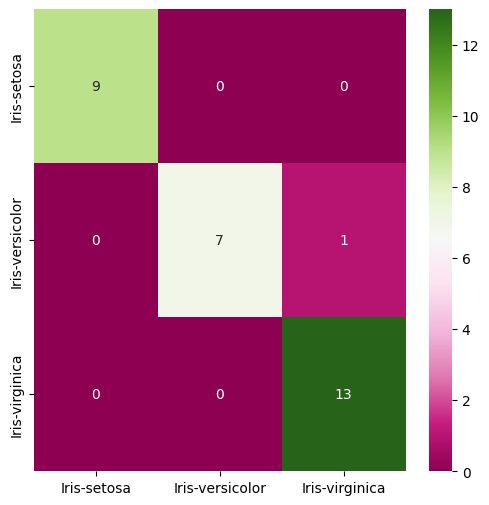

In [35]:
plt.figure(figsize=(6,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='PiYG',xticklabels=y.unique(),yticklabels=y.unique())
plt.show()

In [37]:
# For the first class (Setosa, index 0), second class (Versicolor, index 1),third class (Virginica, index 2)
TP = cm[0, 0] # Setosa correctly classified
FP = cm[0, 1]+cm[0,2] # Setosa incorrectly classified as Versicolor and virginica
TN = cm[1, 1] + cm[1, 2] # Versicolor and Virginica correctly classified
FN = cm[1, 0]+cm[2,0] # Versicolor and virginica incorrectly classified as Setosa

In [38]:
# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
# Compute error rate
error_rate = 1 - accuracy
# Precision, Recall for class Setosa (as an example, but you can compute for other classes too)
precision = TP / (TP + FP) if (TP + FP) != 0 else 0 # Avoid division by zero
recall = TP / (TP + FN) if (TP + FN) != 0 else 0 # Avoid division by zero
# Print the results
print("\nMetrics:")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Error Rate: {error_rate * 100:.2f}%")
print(f"Precision (for Setosa): {precision * 100:.2f}%")
print(f"Recall (for Setosa): {recall * 100:.2f}%")


Metrics:
Accuracy: 96.67%
Error Rate: 3.33%
Precision (for Setosa): 100.00%
Recall (for Setosa): 100.00%
